# Projeto Modulo 5

## Squad verde

### Gabriel Porto
### Kleber Rocha

In [1]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd

import psycopg2

## Milestone #1
#### Criar o diagrama E-R e o modelo relacional do banco de dados.

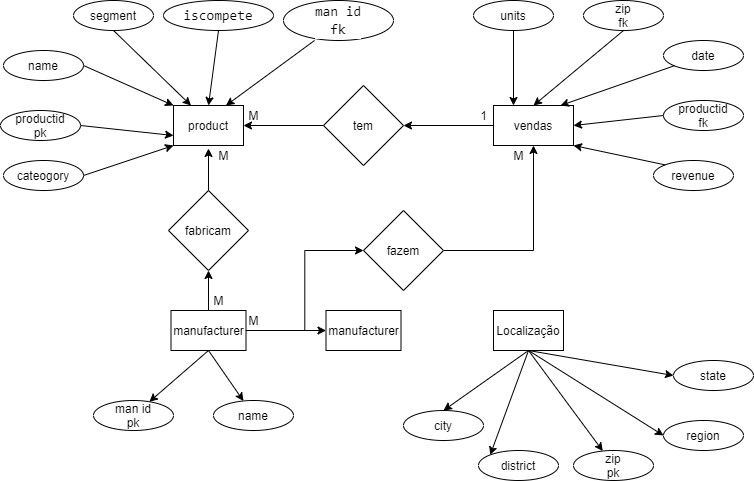

In [4]:
from IPython.display import Image
Image(filename='MOD5_ER.png')

In [2]:
connection = psycopg2.connect(user='postgres', password='postgres',
                                      host='verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com', port='5432')
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = connection.cursor()
name_database = "projmod5"
query = "CREATE DATABASE {};".format(name_database)
try:
    cursor.execute(query)
    retorno = "Banco criado com sucesso!"
except psycopg2.errors.DuplicateDatabase as dd:
    retorno = str(dd)
connection.close()

In [3]:
connection = psycopg2.connect(user='postgres', password='postgres',
                                      host='verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com', port='5432', database="projmod5")
cursor = connection.cursor()


## Milestone #2
#### Criar as queries para criação das tabelas, definidos no passo anterior, e popular essas
#### tabelas.

In [ ]:
sql = 'DROP table IF EXISTS vendas'
cursor.execute(sql)

In [ ]:
query = 'CREATE TABLE vendas(productid FLOAT NOT NULL,date DATE,zip FLOAT NOT NULL, units FLOAT NOT NULL,revenue FLOAT);'
cursor.execute(query)
connection.commit()

In [ ]:
query = 'CREATE TABLE geo(zip FLOAT NOT NULL, city VARCHAR NOT NULL,state VARCHAR NOT NULL,region VARCHAR NOT NULL,district VARCHAR NOT NULL );'
cursor.execute(query)
connection.commit()

In [ ]:
query = 'CREATE TABLE fabricante(manufacturerid FLOAT, manufacturer VARCHAR);'
cursor.execute(query)
connection.commit()

In [ ]:
query = 'CREATE TABLE produto(category VARCHAR NOT NULL, segment VARCHAR NOT NULL,product VARCHAR NOT NULL,productid FLOAT NOT NULL,iscompetehide VARCHAR NOT NULL,manufacturerid FLOAT NOT NULL);'
cursor.execute(query)
connection.commit()

### leitura de arquivos csv
### tratamento de dados

In [ ]:
df_vendas = pd.read_csv("vendas2.csv")

In [ ]:
df_vendas

In [ ]:
df_geo = pd.read_csv('geo.csv')

In [ ]:
df_fab = pd.read_csv('fabricante.csv')

In [ ]:
df_prod = pd.read_csv('produto.csv')

In [ ]:
df_geo['district'] = df_geo['district'].astype('str')

In [ ]:
df_vendas.date = df_vendas.date.str.split(" ").str[0]

In [ ]:
df_vendas["revenue"] = df_vendas["revenue"].str.replace("$", "")
df_vendas["revenue"] = df_vendas["revenue"].str.replace(",", "")
df_vendas["revenue"] = pd.o_numeric(df_vendas.revenue)

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'],format ='%d/%m/%Y')

In [ ]:
del df_vendas['Unnamed: 0']

In [ ]:
df_vendas.to_csv('vendas2.csv',index=False)

In [ ]:
df_geo.city = df_geo.city.str.split(",").str[0]

In [ ]:
df_geo['city'] = df_geo['city'].astype('str')

In [ ]:
df_fab['manufacturer'] = df_fab['manufacturer'].astype('str')

In [ ]:
del df_fab['Unnamed: 0']

In [ ]:
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  database = "projmod5",
                                  host = "verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com",
                                  port = "5432")

    cursor = connection.cursor()
    sql = "INSERT INTO fabricante VALUES({}, '{}')"
    for i in range(len(df_fab)):
        cursor.execute(sql.format(df_fab.iloc[i]["manufacturerid"], df_fab.iloc[i]["manufacturer"]));
    connection.commit()
    
    sql = "SELECT * FROM fabricante;"
    print(pd.read_sql(sql, connection))
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

In [ ]:
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  database = "projmod5",
                                  host = "verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com",
                                  port = "5432")

    cursor = connection.cursor()
    sql = "INSERT INTO produto VALUES('{}', '{}', '{}', {}, '{}',{})"
    for i in range(len(df_prod)):
        cursor.execute(sql.format(df_prod.iloc[i]["category"], df_prod.iloc[i]["segment"], df_prod.iloc[i]["product"], df_prod.iloc[i]["productid"], df_prod.iloc[i]["iscompetehide"],df_prod.iloc[i]["manufacturerid"]));
    connection.commit()
    
    sql = "SELECT * FROM produto;"
    print(pd.read_sql(sql, connection))
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")


In [ ]:
#Usei para subir a tabela de geo. No powershell, na pasta do postgres/bin
psql -h "verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com" -U postgres -d projmod5 -c "\copy geo FROM 'c:/geo.csv' WITH (format csv,header true, delimiter ',');"

In [ ]:
#Usei para subir a tabela de vendas. No powershell, na pasta do postgres/bin
psql -h "verde.cp6xfa6zogly.us-east-2.rds.amazonaws.com" -U postgres -d projmod5 -c "\copy vendas FROM 'c:/vendas2.csv' WITH (format csv,header true, delimiter ',');"

In [ ]:
sql = "SELECT * FROM vendas limit 10;"
print(pd.read_sql(sql, connection))

In [ ]:
sql = "SELECT * FROM fabricante limit 10;"
print(pd.read_sql(sql, connection))

In [ ]:
sql = "SELECT * FROM produto limit 10;"
print(pd.read_sql(sql, connection))

In [ ]:
sql = "SELECT * FROM geo limit 10;"
print(pd.read_sql(sql, connection))

## Milestone #3
#### Elaborar as queries para responder aos questionamentos.

### Questionamento #1
#### Quantos itens foram vendidos no total?

In [5]:
sql = "SELECT sum(vendas.units) FROM vendas"
pd.read_sql(sql, connection)

,sum
0,1299599.0


### Questionamento #2
#### Quais foram as cidades fizeram mais vendas?

In [6]:
sql = """SELECT vendas.zip, geo.city, SUM(vendas.units) FROM vendas LEFT JOIN geo ON geo.zip = vendas.zip 
GROUP BY geo.city,vendas.zip 
ORDER BY SUM(vendas.units) DESC LIMIT 5;"""
pd.read_sql(sql, connection)

,zip,city,sum
0,93065.0,"Simi Valley, CA",949.0
1,92345.0,"Hesperia, CA",887.0
2,92592.0,"Temecula, CA",849.0
3,90501.0,"Torrance, CA",843.0
4,92562.0,"Murrieta, CA",755.0


### Questionamento #3
#### Qual o mês com a maior receita de vendas da Van Arsdel?

In [8]:
sql = """SELECT 
fabricante.manufacturer,
SUM(vendas.revenue) , EXTRACT(MONTH from vendas.date)
FROM
produto
INNER JOIN fabricante ON fabricante.manufacturerid = produto.manufacturerid
INNER JOIN vendas ON vendas.productid = produto.productid  WHERE manufacturer = 'VanArsdel'
GROUP BY manufacturer, EXTRACT(MONTH from vendas.date) ORDER BY SUM(vendas.revenue) DESC LIMIT 1"""
pd.read_sql(sql, connection)


,manufacturer,sum,date_part
0,VanArsdel,3.538930e+08,12.0


### Questionamento #4
#### Qual a média de receita do setor por ano?

In [10]:
sql4 = 'SELECT AVG(revenue), EXTRACT(YEAR from date) FROM vendas GROUP BY EXTRACT(YEAR from date) ORDER BY AVG(revenue) ;'
pd.read_sql(sql4, connection)

,avg,date_part
0,4566.893902,2001.0
1,4588.099752,2002.0
2,4697.194451,2003.0
3,4732.637894,2000.0
4,4763.034782,2004.0
5,4979.317691,1999.0
6,4985.126381,2005.0
7,5311.919780,2006.0
8,5669.344445,2007.0
9,5788.228927,2008.0


### Questionamento #5
#### Qual o segmento mais lucrativo para a Van Arsdel?

In [11]:
sql = '''SELECT SUM(vendas.revenue), fabricante.manufacturer, produto.segment
            FROM produto
            INNER JOIN vendas ON produto.productid = vendas.productid
            INNER JOIN fabricante ON produto.manufacturerid = fabricante.manufacturerid WHERE manufacturer = 'VanArsdel'
            GROUP BY (produto.segment, fabricante.manufacturer) ORDER BY sum DESC LIMIT 1;'''
pd.read_sql(sql, connection)


,sum,manufacturer,segment
0,1.687086e+09,VanArsdel,Moderation


### Questionamento #6
#### Dentro do segmento menos lucrativo, qual foi o produto que gerou mais receita?

In [12]:
sql = '''SELECT produto.segment, vendas.productid, SUM(vendas.revenue)
            FROM vendas
            INNER JOIN produto ON produto.productid = vendas.productid WHERE segment = 'Productivity' and Revenue IS NOT NULL
            GROUP BY produto.segment, vendas.productid ORDER BY sum DESC LIMIT 1;'''
pd.read_sql(sql, connection)

,segment,productid,sum
0,Productivity,733.0,29225945.07


### Questionamento #7
#### Qual o pior concorrente da Van Arsdel? Por quê?

In [13]:
sql = ''' SELECT SUM(v.revenue) AS Revenue, f.manufacturer AS Manufacturer FROM vendas v
                INNER JOIN produto p ON p.productid = v.productid
                INNER JOIN fabricante f ON f.manufacturerid = p.manufacturerid
                GROUP BY(f.manufacturer) ORDER BY Revenue LIMIT 1;'''
pd.read_sql(sql, connection)


,revenue,manufacturer
0,4586284.08,Salvus


##### A pior concorrente é a Salvus, pois tem a menor receita

### Questionamento #8
#### Do estado com maior número de cidade distintas, qual foi a cidade que mais fez
#### receita?

In [14]:
sql = '''SELECT SUM(v.revenue) AS revenue, g.city AS city
        FROM vendas v
        INNER JOIN geo g ON v.zip = g.zip
        WHERE state in (SELECT state FROM geo GROUP BY state ORDER BY COUNT(city) DESC LIMIT 1)
        GROUP BY g.city
        ORDER BY revenue DESC LIMIT 1;'''
pd.read_sql(sql, connection)

,revenue,city
0,30136598.73,"San Diego, CA"
